In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# anova test
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [26]:
data = pd.read_csv('../out/study3.csv')
data

,metric,mean,method,i,dataset
0,CCC,0.550256,KF,0,simulated
1,MAE,1.217205,KF,0,simulated
2,R2,0.364502,KF,0,simulated
3,RMSE,1.552162,KF,0,simulated
4,RMSPE,114.475878,KF,0,simulated
...,...,...,...,...,...
15995,RMSE,6.570647,block,499,real
15996,RMSPE,0.134175,block,499,real
15997,RSR,1.070399,block,499,real
15998,r,0.172760,block,499,real


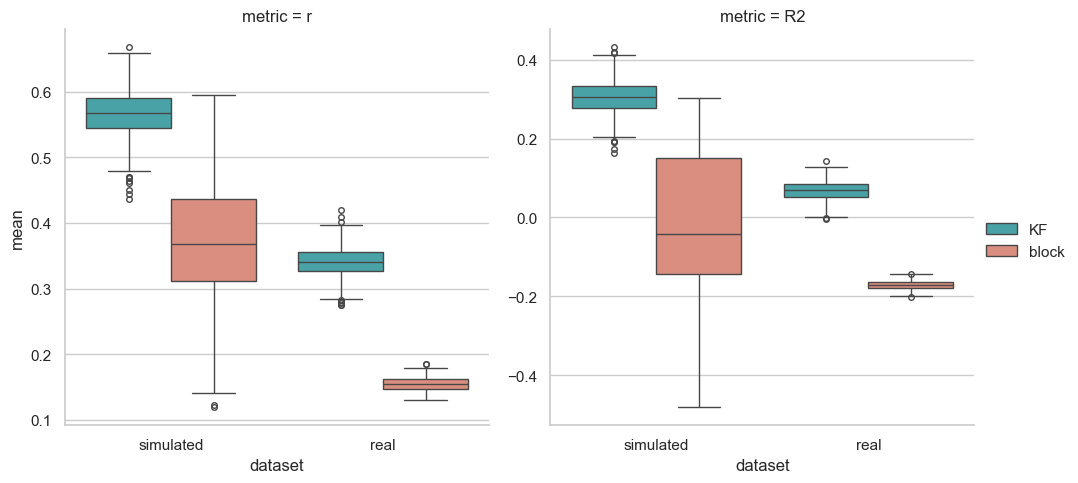

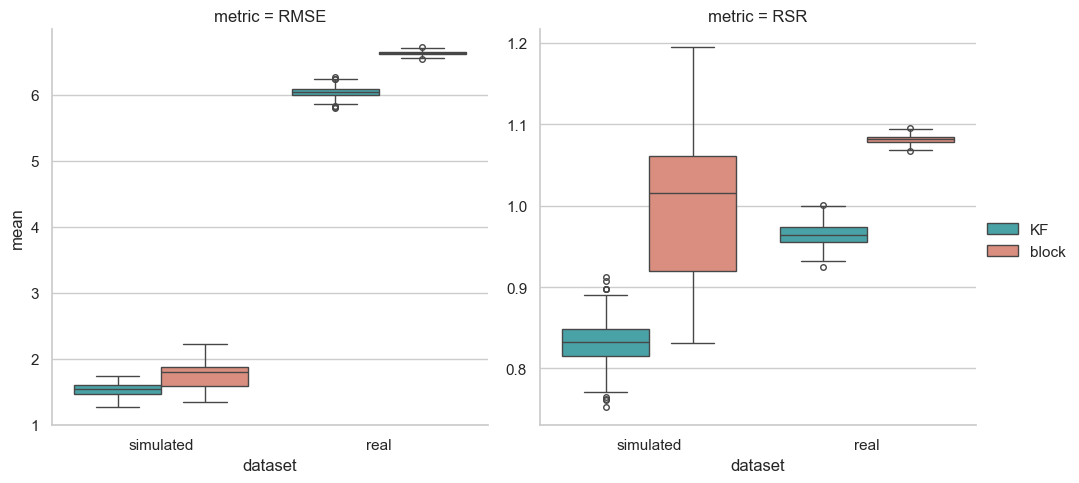

In [33]:
sns.set_theme(style="whitegrid")
palette = ["#39B1B5", "#E88471"]

g = sns.FacetGrid(data,
    col="metric", col_order=["r", "R2"],
    col_wrap=2,
    sharey=False, height=5, 
    palette=palette,)
g.map_dataframe(sns.boxplot, x="dataset", y="mean", fliersize=4,
                hue="method", dodge=True, palette=palette)
g.add_legend()
plt.savefig('../out/study3_linear.png', dpi=300)
plt.show()
plt.close()

g = sns.FacetGrid(data,
    col="metric", col_order=["RMSE", "RSR"],
    col_wrap=2,
    sharey=False, height=5, 
    palette=palette,)
g.map_dataframe(sns.boxplot, x="dataset", y="mean", fliersize=4,
                hue="method", dodge=True, palette=palette)
# y limit
g.add_legend()
plt.savefig('../out/study3_error.png', dpi=300)
plt.show()
plt.close()

In [28]:
formula = 'mean ~ method'
dataset = ["simulated", "real"]
metrics = ["r", "R2", "RMSE", "MAE"]
for d in dataset:
    for m in metrics:
        # ANOVA
        model = ols(formula, data.query(f"dataset == '{d}' and metric == '{m}'")).fit()
        aov_table = anova_lm(model)
        print()
        print(f"Dataset: {d}, Metric: {m}")
        print(aov_table)



Dataset: simulated, Metric: r
             df    sum_sq   mean_sq            F         PR(>F)
method      1.0  9.615505  9.615505  2122.691069  2.634789e-249
Residual  998.0  4.520806  0.004530          NaN            NaN

Dataset: simulated, Metric: R2
             df     sum_sq    mean_sq           F         PR(>F)
method      1.0  26.098414  26.098414  1790.71776  6.419134e-225
Residual  998.0  14.545127   0.014574         NaN            NaN

Dataset: simulated, Metric: RMSE
             df     sum_sq    mean_sq           F        PR(>F)
method      1.0  11.574282  11.574282  559.590274  1.431418e-98
Residual  998.0  20.642127   0.020683         NaN           NaN

Dataset: simulated, Metric: MAE
             df     sum_sq   mean_sq           F         PR(>F)
method      1.0   7.993424  7.993424  571.683986  2.996938e-100
Residual  998.0  13.954278  0.013982         NaN            NaN

Dataset: real, Metric: r
             df    sum_sq   mean_sq             F  PR(>F)
method      1.0